In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = sns.load_dataset("iris")

## QQ PLOT

<Axes: xlabel='sepal_length', ylabel='Density'>

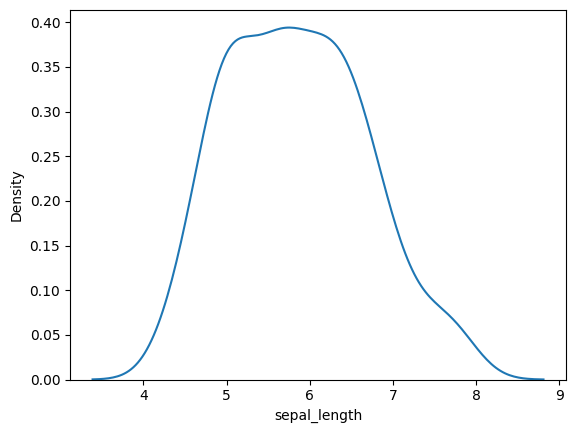

In [3]:
sns.kdeplot(df['sepal_length'])

##### *`Step 1`: Sorting all the values of Y (sepal length)*

In [4]:
temp = sorted(df['sepal_length'].tolist())

##### *`Step 2`: Calculating percentiles (100 quantiles) of the sorted Y*

In [5]:
y_quant = []           

for i in range(1,101):
    y_quant.append(np.percentile(temp,i))

##### *`Step 3`: Generating a theoretical data (normally distributed)*

In [6]:
samples = np.random.normal(loc = 0, scale = 1, size = 1000)

##### *`Step 4`: Calculating 100 quantiles (percentile) of the theoretical data*

In [7]:
x_quant = []

for i in range(1,101):
    x_quant.append(np.percentile(samples,i))

##### *`Step 5`: Plotting the scatterplot*

<Axes: >

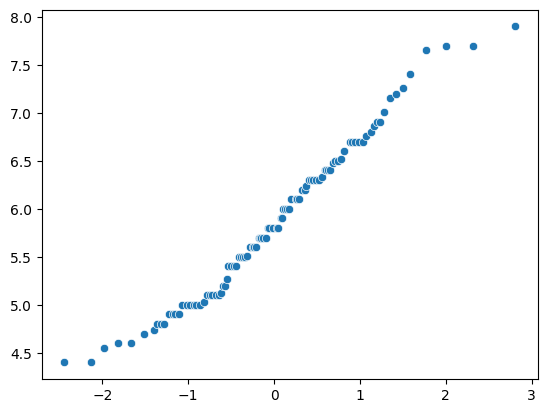

In [8]:
sns.scatterplot(x = x_quant, y = y_quant)

## Alternate way : statsmodel

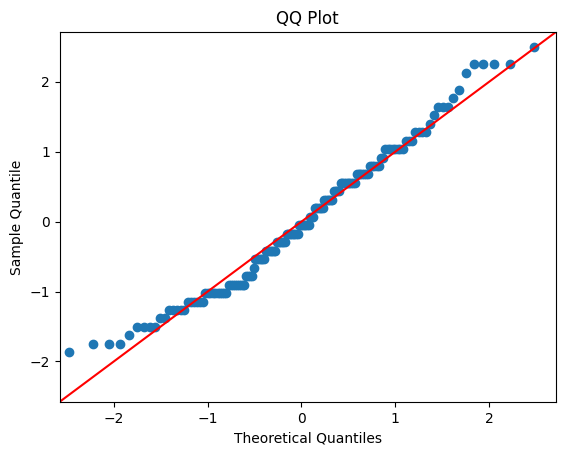

In [9]:
fig = sm.qqplot(df['sepal_length'], line = '45', fit = True)

plt.title("QQ Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantile")

plt.show()

![Interpretion](https://miro.medium.com/v2/resize:fit:1024/0*i0IBOX7POkxv6xre.jpeg)

![thin tail](https://miro.medium.com/v2/resize:fit:1400/1*YtidhzyY8VtL4-QE9ce3QQ.png)


![fat tails](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSiITDKTdfa4IQnDc6qNVSGiuGjC3deyyhDaP_3yKz3Lu_ieys7fs7lpHewwWNMfXQLBJI&usqp=CAU)

## Detecting another distribution using QQ Plot

##### *`Step 1`: Generating a random data*

In [10]:
x = np.random.uniform(low = 0, high = 1, size = 1000)

(array([101., 110.,  87., 111., 104.,  98.,  89.,  96.,  98., 106.]),
 array([5.90290278e-04, 1.00522976e-01, 2.00455663e-01, 3.00388349e-01,
        4.00321035e-01, 5.00253721e-01, 6.00186407e-01, 7.00119093e-01,
        8.00051779e-01, 8.99984466e-01, 9.99917152e-01]),
 <BarContainer object of 10 artists>)

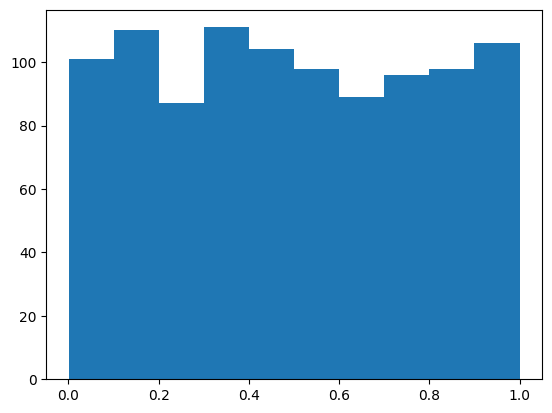

In [11]:
plt.hist(x)

##### *`Step 2`:  Fitting a uniform distribution instead of normal*

In [12]:
params = stats.uniform.fit(x)   #used to fit a uniform distribution to the data provided in the array x
dist = stats.uniform(loc = params[0], scale = params[1])

In [13]:
params
#loc (a) = lower bound of the uniform distribution
#scale (b)= upper bound 

(0.0005902902781287356, 0.999326861405735)

*Note: `dist` parameter specifies the comparison distribution. The default is scipy.stats.distributions.norm (a standard normal).*

##### *`Step 3`: Plot the QQ Plot*

Text(0, 0.5, 'Sample Quantiles')

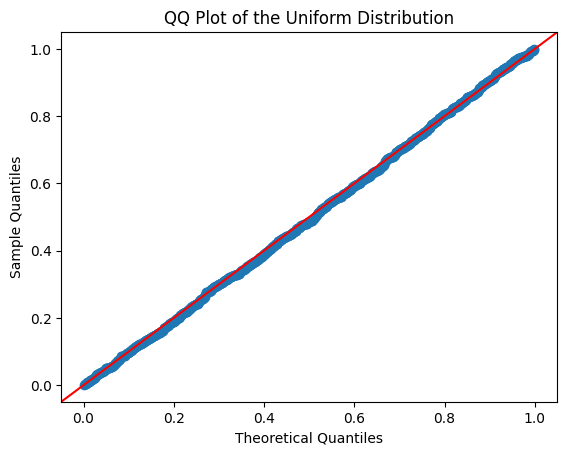

In [14]:
fig = sm.qqplot(x , dist = dist, line ='45')

plt.title("QQ Plot of the Uniform Distribution")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

## Detecting Pareto Distribution

##### *`Step 1`: Plot the graph of X and Y*

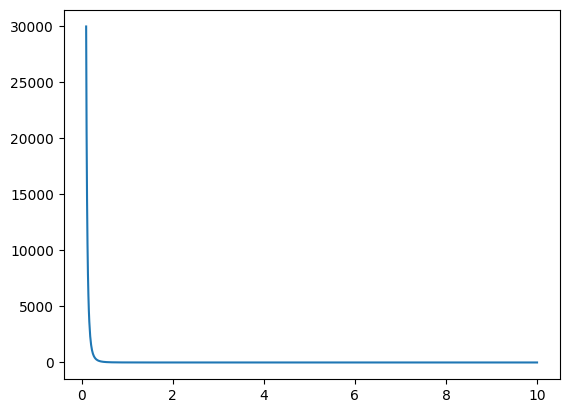

In [15]:
alpha = 3
xm = 1

x = np.linspace(0.1, 10,1000)   #create an array of x values

y = alpha * (xm**alpha) / (x**(alpha+1))  #find y using pdf

plt.plot(x,y)



##### *`Step 2`: Plot the graph of log(X) and log(Y)*

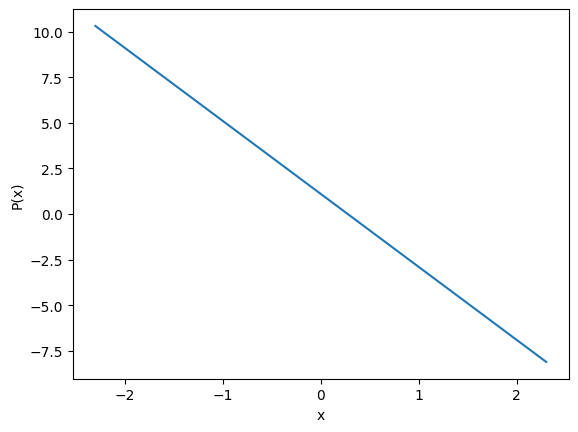

In [16]:
plt.plot(np.log(x),np.log(y))

plt.xlabel('x')
plt.ylabel('P(x)')

plt.show()

*As it is forming a downward sloping straight line, we can say that the above distribution was infact Pareto Distribution*

In [17]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
